___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    17414
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

In [5]:
# season


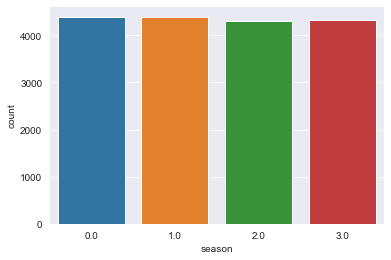

In [6]:
sns.countplot(data = df, x = 'season');

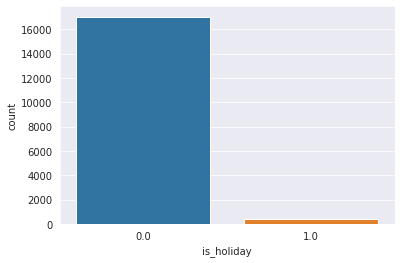

In [ ]:
# is_holiday


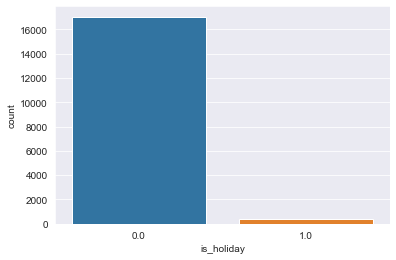

In [7]:
sns.countplot(data = df, x = 'is_holiday');

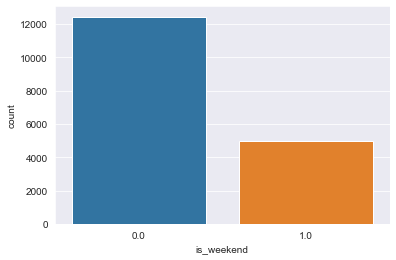

In [8]:
# is_weekend
sns.countplot(data = df, x = 'is_weekend');

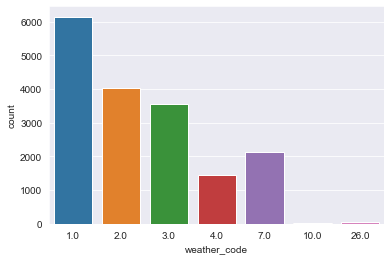

In [9]:
sns.countplot(data = df, x = 'weather_code');

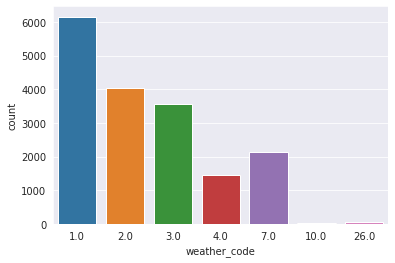

In [ ]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [10]:
df.timestamp.dtype

dtype('O')

In [11]:
df.timestamp = df.timestamp.apply(pd.to_datetime)

In [12]:
df.timestamp.dtype.type

numpy.datetime64

In [13]:
df.set_index(df.timestamp, inplace=True)

In [14]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [15]:
df['year_month']= df.index.strftime('%Y-%m')
df['year'] = df.index.year
df['month']= df.index.month
df['day_of_month']= df.index.day
df['day_of_week']=df.index.dayofweek
df['hour']=df.index.hour

In [16]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [17]:
df.drop('timestamp', axis = 1, inplace = True)

In [18]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

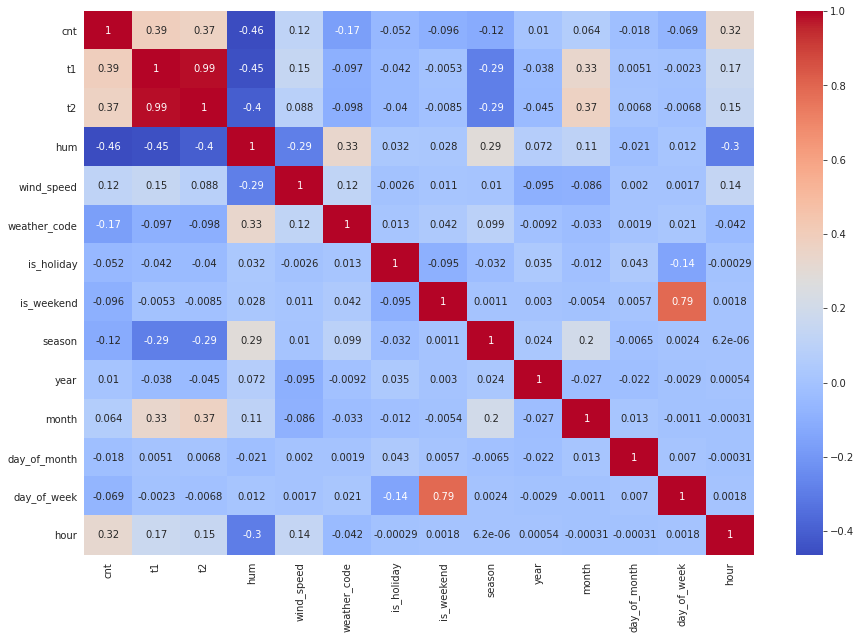

In [ ]:
# for all variables 


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   year_month    17414 non-null  object 
 10  year          17414 non-null  int64  
 11  month         17414 non-null  int64  
 12  day_of_month  17414 non-null  int64  
 13  day_of_week   17414 non-null  int64  
 14  hour          17414 non-null  int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 2.1+ MB


In [20]:
df_1 = df.copy()

In [21]:
df_1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


In [23]:
df_1.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
cnt,1.000000,0.388798,0.369035,-0.462901,0.116295,-0.166633,-0.051698,-0.096499,-0.116180,0.010046,0.063757,-0.017887,-0.068688,0.324423
t1,0.388798,1.000000,0.988344,-0.447781,0.145471,-0.097114,-0.042233,-0.005342,-0.285851,-0.037959,0.332712,0.005072,-0.002317,0.168708
t2,0.369035,0.988344,1.000000,-0.403495,0.088409,-0.098385,-0.040051,-0.008510,-0.285900,-0.044972,0.368366,0.006791,-0.006824,0.153956
hum,-0.462901,-0.447781,-0.403495,1.000000,-0.287789,0.334750,0.032068,0.028098,0.290381,0.072443,0.113149,-0.020868,0.011556,-0.295653
wind_speed,0.116295,0.145471,0.088409,-0.287789,1.000000,0.124803,-0.002606,0.011479,0.010305,-0.094739,-0.086383,0.002040,0.001708,0.141792
weather_code,-0.166633,-0.097114,-0.098385,0.334750,0.124803,1.000000,0.012939,0.042362,0.098976,-0.009234,-0.033253,0.001904,0.020619,-0.041786
is_holiday,-0.051698,-0.042233,-0.040051,0.032068,-0.002606,0.012939,1.000000,-0.094898,-0.032488,0.034631,-0.011511,0.042657,-0.144628,-0.000288
is_weekend,-0.096499,-0.005342,-0.008510,0.028098,0.011479,0.042362,-0.094898,1.000000,0.001067,0.003049,-0.005406,0.005721,0.791975,0.001803
season,-0.116180,-0.285851,-0.285900,0.290381,0.010305,0.098976,-0.032488,0.001067,1.000000,0.024400,0.203249,-0.006460,0.002356,0.000006
year,0.010046,-0.037959,-0.044972,0.072443,-0.094739,-0.009234,0.034631,0.003049,0.024400,1.000000,-0.026547,-0.021935,-0.002876,0.000542


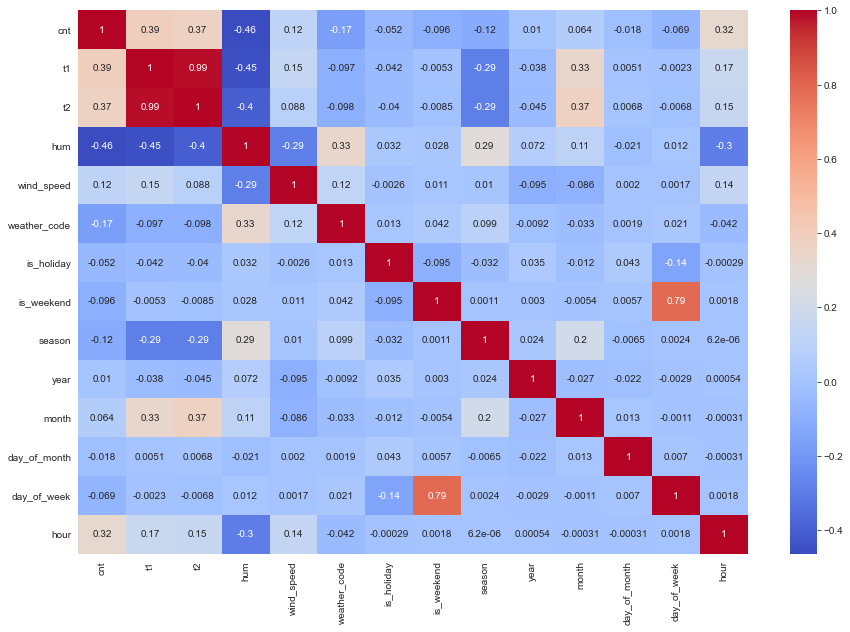

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True);

In [47]:
df_1.columns.sort_values()

Index(['cnt', 'day_of_month', 'days_of_week', 'hour', 'hum', 'is_holiday',
       'is_weekend', 'month', 'season', 't1', 't2', 'weather_code',
       'wind_speed', 'year'],
      dtype='object')

In [62]:
x = df_1.corr()[['cnt']]

In [64]:
#x_1 = x.sort_values(by = ['cnt'], ascending = True)
#x_1

,cnt
hum,-0.462901
weather_code,-0.166633
season,-0.116180
is_weekend,-0.096499
days_of_week,-0.068688
is_holiday,-0.051698
year,0.010046
day_of_month,0.050570
month,0.063757
wind_speed,0.116295


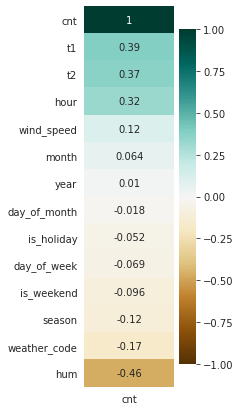

In [ ]:
# for the target variable


<AxesSubplot:>

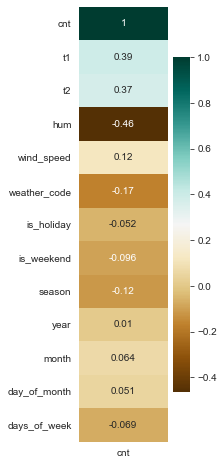

In [50]:
plt.figure(figsize=(2,8))
sns.heatmap(x, annot = True, cmap= 'BrBG')

### 8. Visualize the correlation of the target variable and the other features with barplot

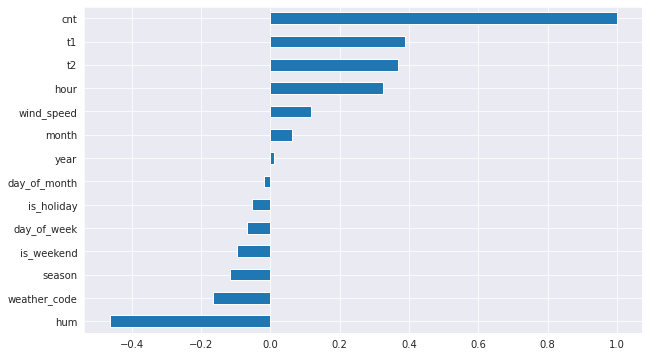

In [ ]:
#with pandas


In [65]:
x_1.index

Index(['hum', 'weather_code', 'season', 'is_weekend', 'days_of_week',
       'is_holiday', 'year', 'day_of_month', 'month', 'wind_speed', 't2', 't1',
       'cnt'],
      dtype='object')

In [66]:
x_1.values

array([[-0.46290096],
       [-0.16663276],
       [-0.11618023],
       [-0.09649912],
       [-0.06868785],
       [-0.0516983 ],
       [ 0.01004604],
       [ 0.05056973],
       [ 0.06375725],
       [ 0.11629523],
       [ 0.36903479],
       [ 0.38879845],
       [ 1.        ]])

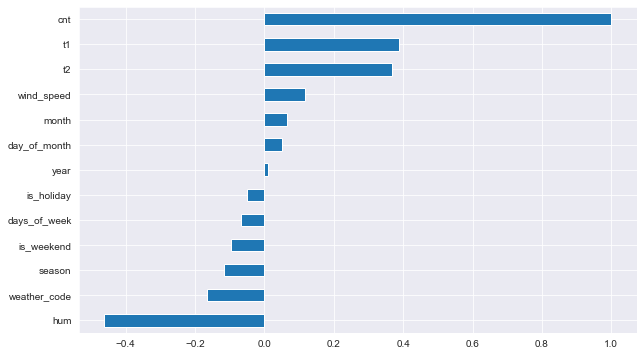

In [86]:
x_1.plot.barh(figsize = (10,6), legend = False);

### 9.Plot bike shares over time use lineplot

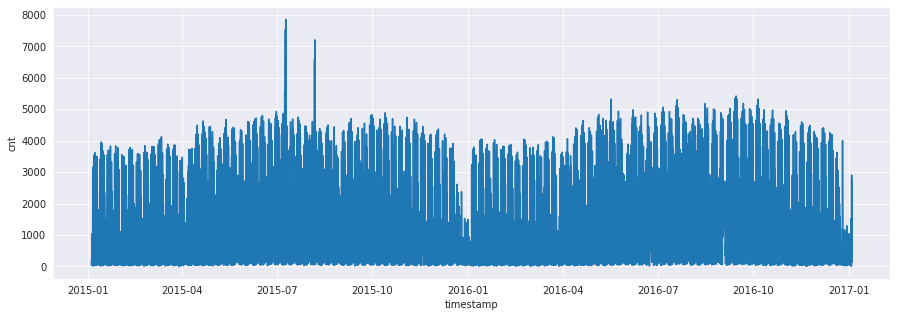

In [72]:
df.timestamp.value_counts

<bound method IndexOpsMixin.value_counts of timestamp
2015-01-04 00:00:00    2015-01-04 00:00:00
2015-01-04 01:00:00    2015-01-04 01:00:00
2015-01-04 02:00:00    2015-01-04 02:00:00
2015-01-04 03:00:00    2015-01-04 03:00:00
2015-01-04 04:00:00    2015-01-04 04:00:00
                              ...         
2017-01-03 19:00:00    2017-01-03 19:00:00
2017-01-03 20:00:00    2017-01-03 20:00:00
2017-01-03 21:00:00    2017-01-03 21:00:00
2017-01-03 22:00:00    2017-01-03 22:00:00
2017-01-03 23:00:00    2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: object>

In [91]:
#sns.barplot(data = df, x = 'timestamp', y = 'cnt')

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [154]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,days_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,31,6,0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,31,6,1
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,2
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,3
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,31,6,4


In [263]:
df_new = df.copy()

In [264]:
df_new['year_month'] = df_new.index.strftime('%Y-%m')

In [161]:
my_x = df_new.year_month.value_counts().sort_index()
my_x

2015-01    671
2015-02    671
2015-03    739
2015-04    719
2015-05    744
2015-06    717
2015-07    740
2015-08    744
2015-09    711
2015-10    736
2015-11    711
2015-12    740
2016-01    744
2016-02    688
2016-03    729
2016-04    719
2016-05    744
2016-06    705
2016-07    741
2016-08    740
2016-09    683
2016-10    743
2016-11    719
2016-12    744
2017-01     72
Name: year_month, dtype: int64

In [183]:
my_y= df_new.cnt.groupby(df_new['year_month']).sum()
my_y

year_month
2015-01     546639
2015-02     543594
2015-03     695934
2015-04     831582
2015-05     895413
2015-06    1033252
2015-07    1120687
2015-08    1033951
2015-09     892478
2015-10     865046
2015-11     677332
2015-12     602838
2016-01     582518
2016-02     592910
2016-03     656527
2016-04     768845
2016-05    1001935
2016-06     933878
2016-07    1165527
2016-08    1137314
2016-09     998619
2016-10     935706
2016-11     703859
2016-12     651908
2017-01      37680
Name: cnt, dtype: int64

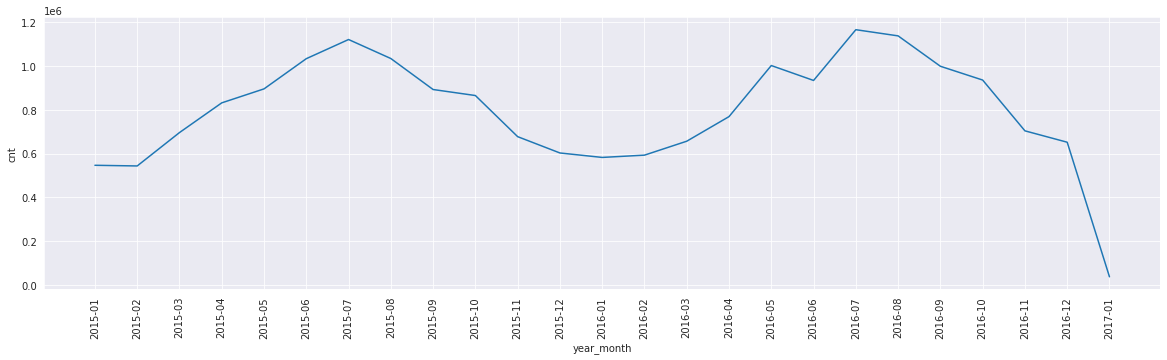

In [ ]:
# with lineplot


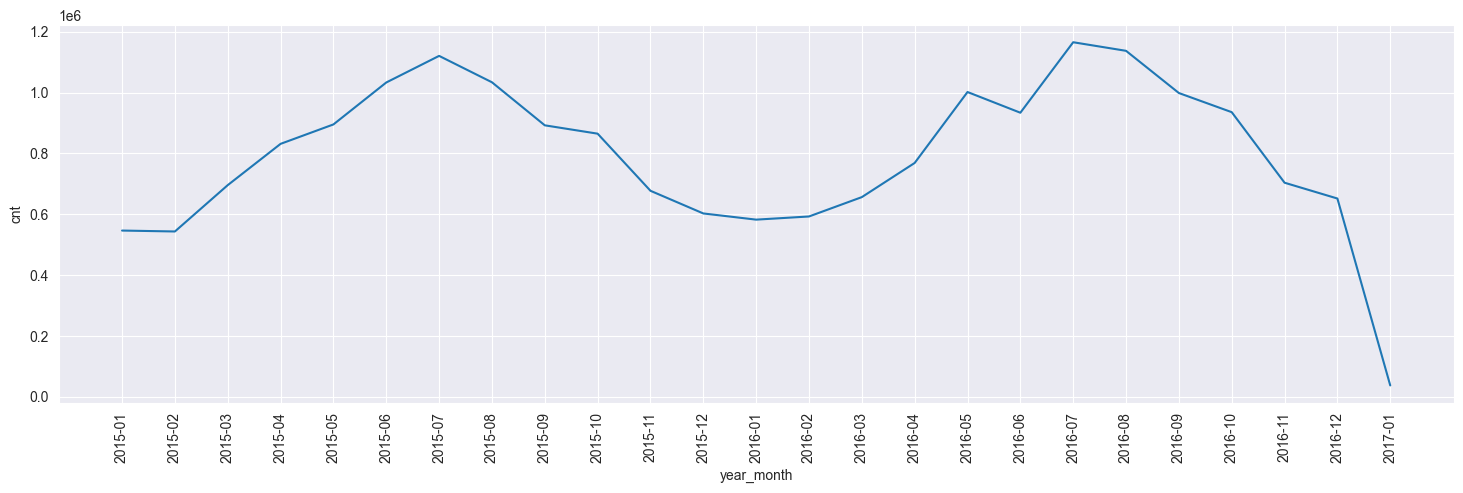

In [193]:
plt.figure(figsize=(18,5), dpi = 100)
sns.lineplot(my_x.index,my_y.values)
plt.xticks(rotation = 90)
plt.xlabel('year_month')
plt.ylabel('cnt');

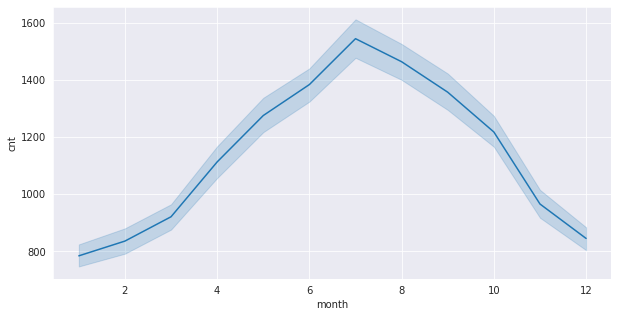

In [ ]:
# with lineplot


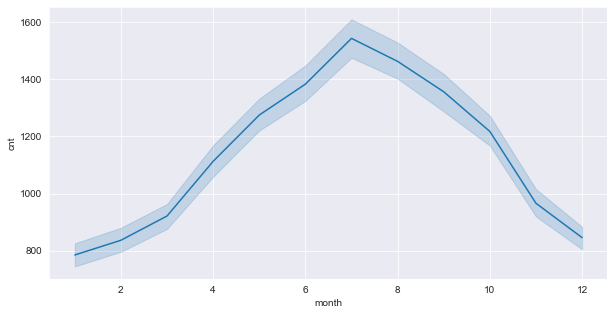

In [201]:
plt.figure(figsize= (10,5))
sns.lineplot(data = df_new, x = 'month', y = 'cnt');

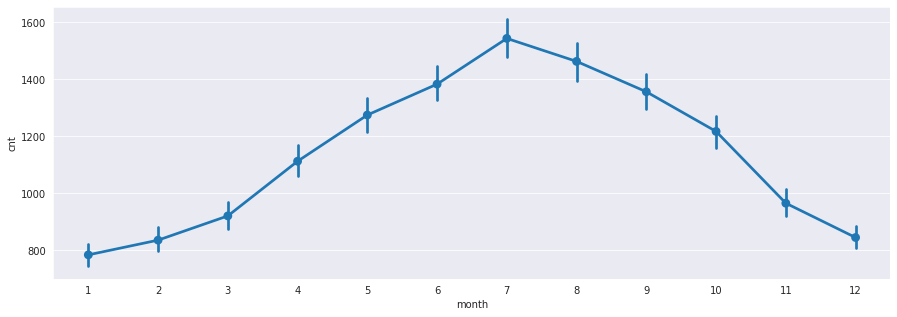

In [ ]:
# with pointplot


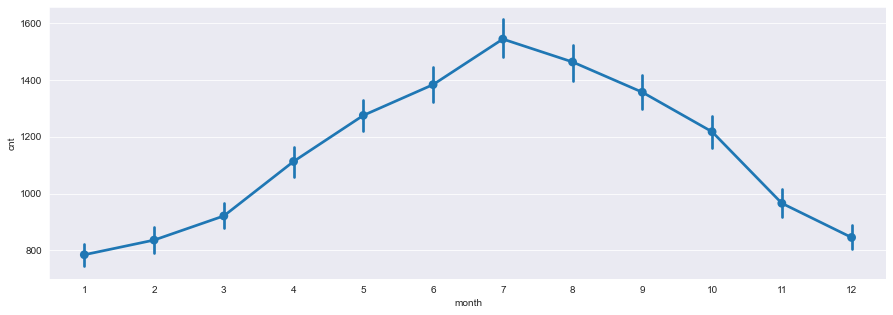

In [207]:
plt.figure(figsize= (15,5))
sns.pointplot(data = df_new, x = 'month', y = 'cnt');

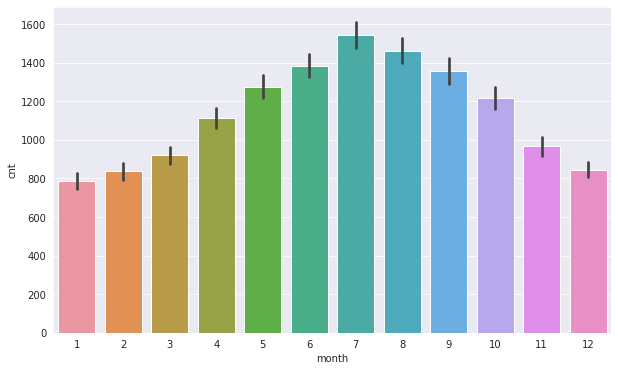

In [ ]:
# with barplot


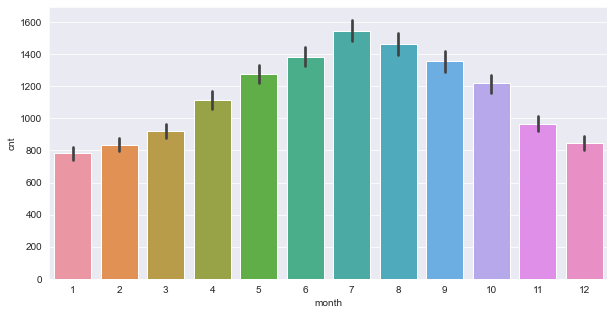

In [208]:
plt.figure(figsize= (10,5))
sns.barplot(data = df_new, x = 'month', y = 'cnt');

### 11.Plot bike shares by hours on (holidays, weekend, season)

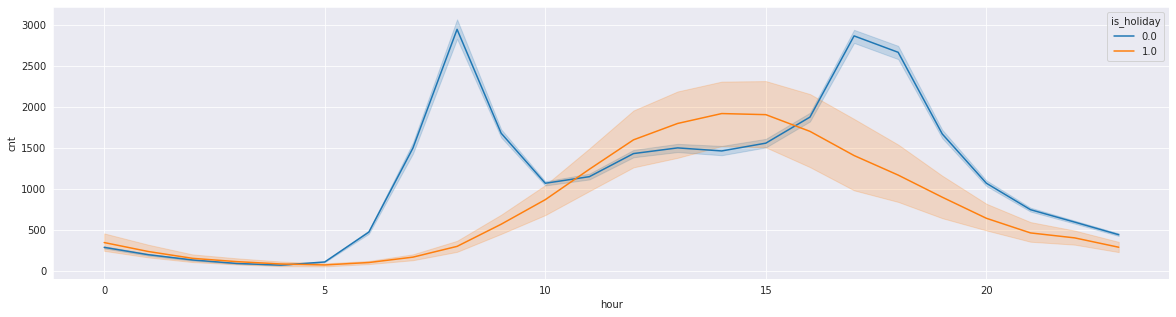

In [ ]:
# with lineplot (*whether it is a holiday or not*)


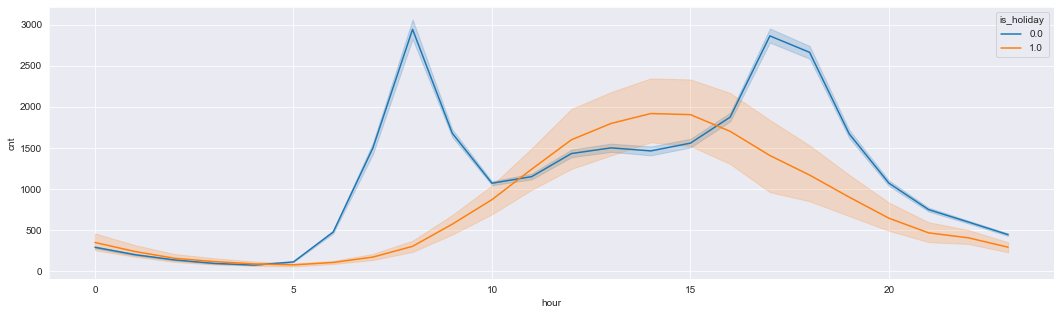

In [211]:
plt.figure(figsize= (18,5))
sns.lineplot(data = df_new, x = 'hour', y = 'cnt', hue = 'is_holiday');

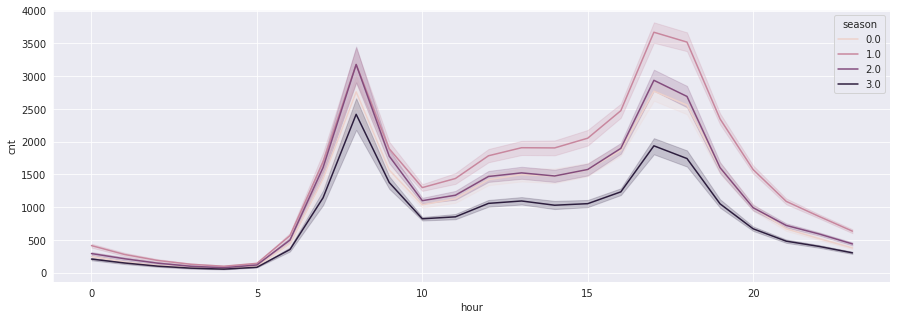

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


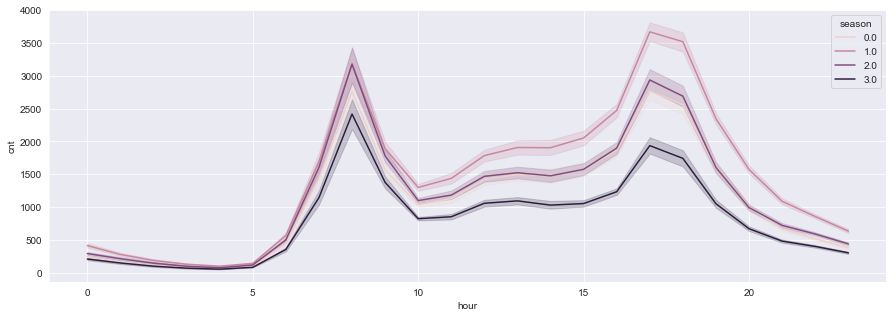

In [218]:
plt.figure(figsize= (15,5))
sns.lineplot(data = df_new, x = 'hour', y = 'cnt', hue = 'season');

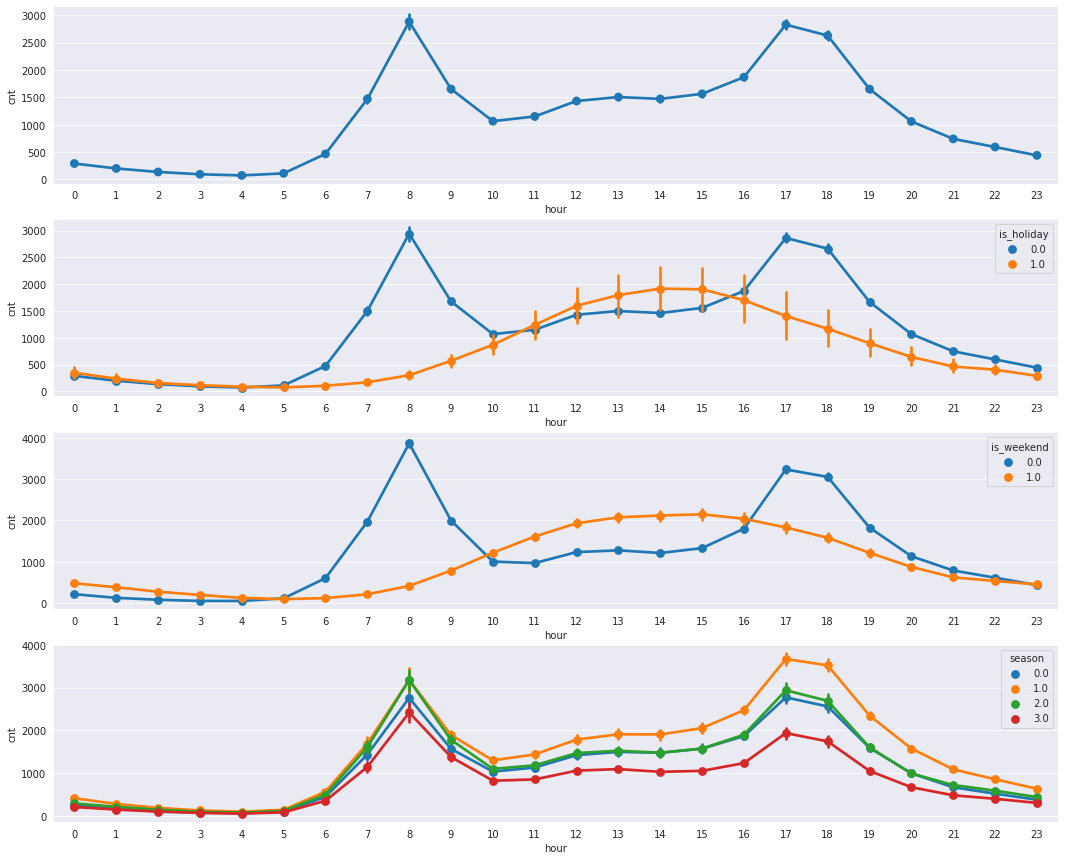

In [ ]:
# with pointplot


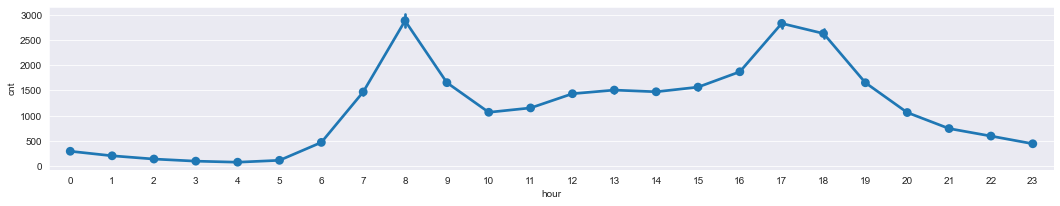

In [221]:
plt.figure(figsize= (18,3))
sns.pointplot(data = df_new, x = 'hour', y = 'cnt');

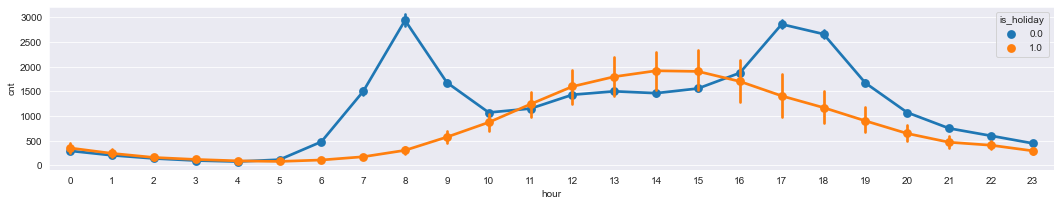

In [223]:
plt.figure(figsize= (18,3))
sns.pointplot(data = df_new, x = 'hour', y = 'cnt', hue = 'is_holiday');

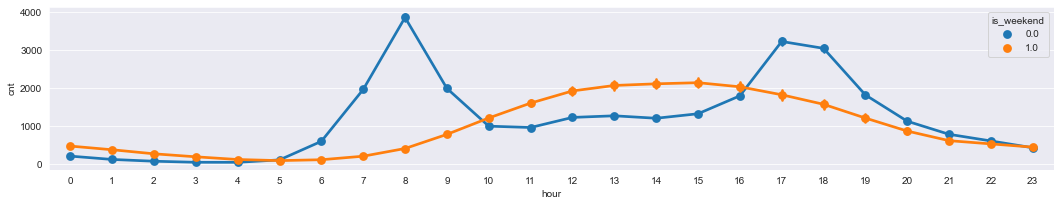

In [224]:
plt.figure(figsize= (18,3))
sns.pointplot(data = df_new, x = 'hour', y = 'cnt', hue = 'is_weekend');

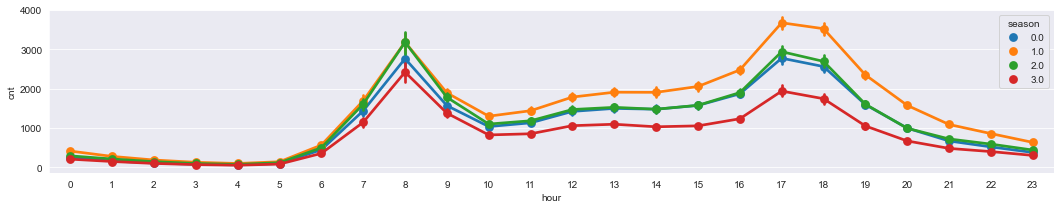

In [225]:
plt.figure(figsize= (18,3))
sns.pointplot(data = df_new, x = 'hour', y = 'cnt', hue = 'season');

### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

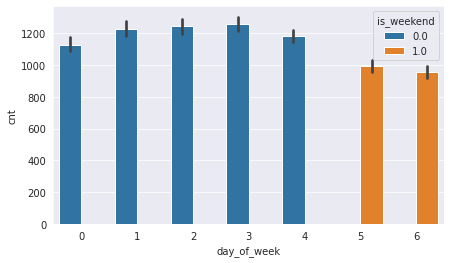

In [ ]:
# with barplot


In [229]:
df_new.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,days_of_week,hour,year_month
timestamp,,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,31,6,0,2015-01
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,31,6,1,2015-01
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,2,2015-01
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,3,2015-01
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,31,6,4,2015-01


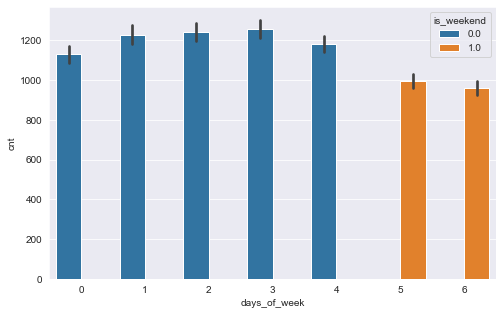

In [237]:
plt.figure(figsize= (8,5))
sns.barplot(data = df_new, x = 'days_of_week', y = 'cnt', hue = 'is_weekend');

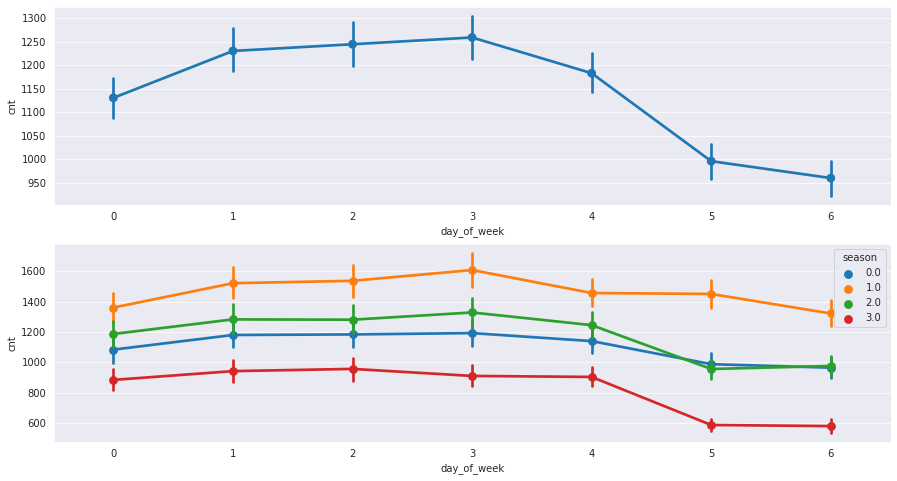

In [ ]:
# with pointplot


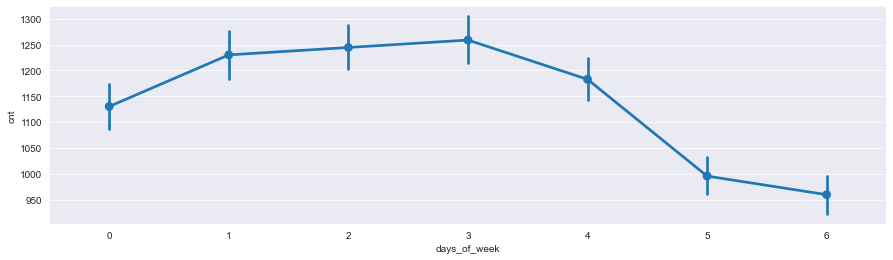

In [240]:
plt.figure(figsize= (15,4))
sns.pointplot(data = df_new, x = 'days_of_week', y = 'cnt');

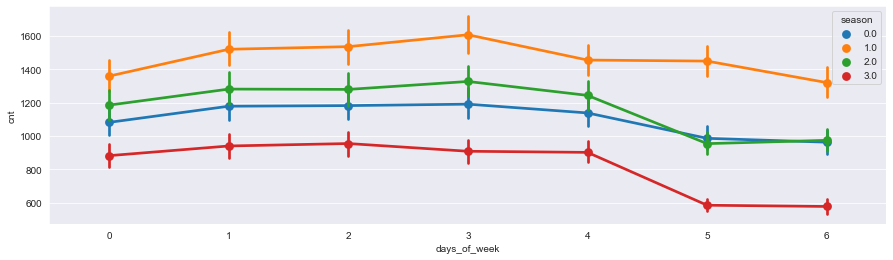

In [244]:
plt.figure(figsize= (15,4))
sns.pointplot(data = df_new, x = 'days_of_week', y = 'cnt', hue = 'season');

### 13.Plot bike shares by day of month

In [267]:
#df_new.day_of_month.value_counts()

In [269]:
df_new.sample()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,days_of_week,hour,year_month
timestamp,,,,,,,,,,,,,,,,
2016-01-11 19:00:00,2016-01-11 19:00:00,1479,7.0,3.5,78.5,21.5,3.0,0.0,0.0,3.0,2016,1,11,0,19,2016-01


day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


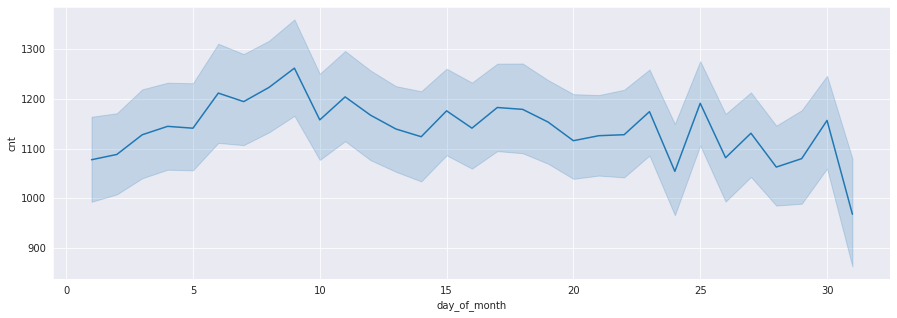

In [ ]:
#with lineplot



<AxesSubplot:xlabel='day_of_month', ylabel='cnt'>

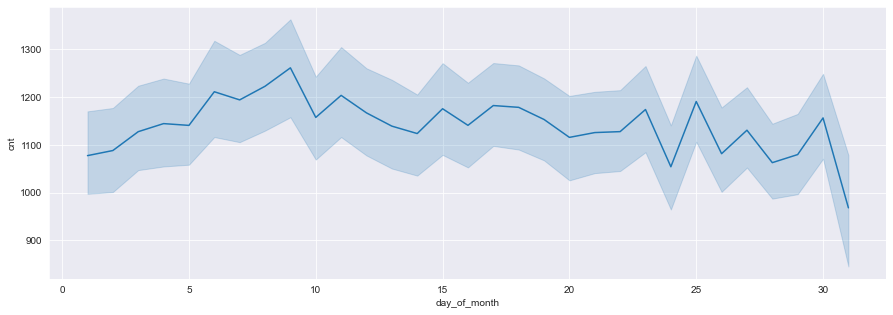

In [311]:
plt.figure(figsize= (15,5))
sns.lineplot(data = df_new , x= 'day_of_month', y = 'cnt' )

### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

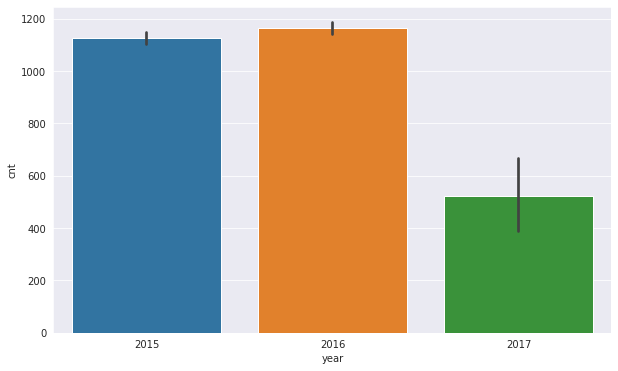

In [11]:
# with barplot


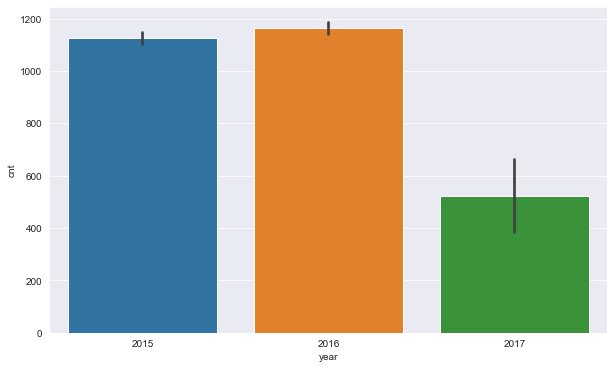

In [319]:
plt.figure(figsize=(10,6))
sns.barplot(data = df_new, x = 'year', y = 'cnt');

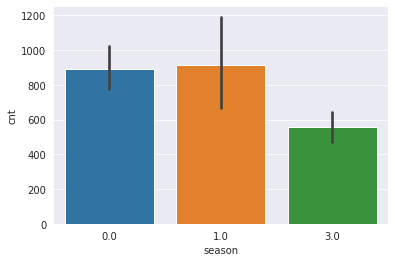

In [12]:
# with barplot

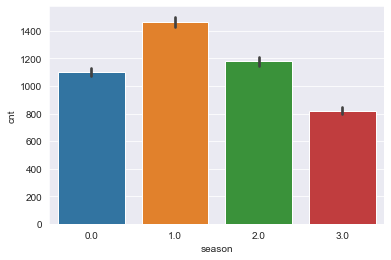

In [321]:
#plt.figure(figsize=(10,6))
sns.barplot(data = df_new, x = 'season', y = 'cnt');

In [322]:
df.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [323]:
df_new.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

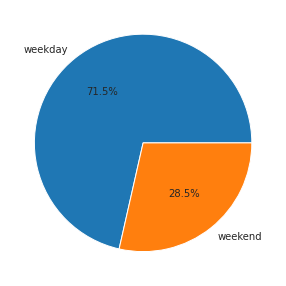

In [ ]:
# pie chart

In [ ]:
#df_new.plot.pie(y = 'is_weekend')

In [353]:
def my_weekend(is_weekend):
    if is_weekend == 0.0:
        return 'weekday'
    else:
        return 'weekend'

In [355]:
df_new.is_weekend = df_new.is_weekend.apply(my_weekend)

In [357]:
df_new.is_weekend.value_counts()

weekday    12444
weekend     4970
Name: is_weekend, dtype: int64

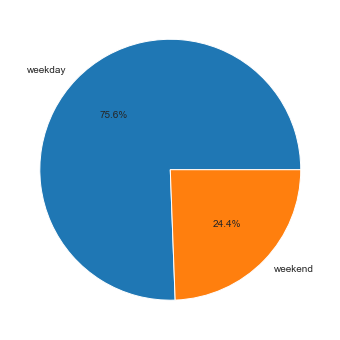

In [373]:
df_new.groupby(df_new['is_weekend']).sum().plot(kind = 'pie', y = 'cnt', legend = False, autopct = '%1.1f%%', figsize= (6,6))
plt.ylabel('');

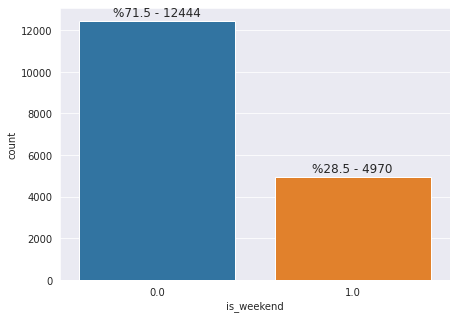

In [ ]:
# with countplot



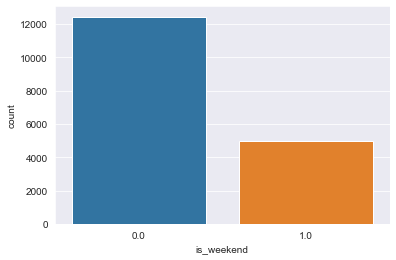

In [378]:
sns.countplot(data = df, x = 'is_weekend');

### 16.Plot the distribution of weather code by seasons

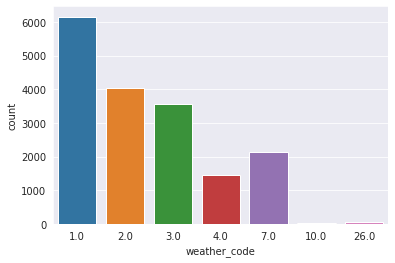

In [ ]:
# with countplot


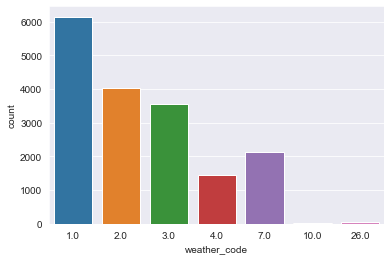

In [380]:
sns.countplot(data = df_new, x = 'weather_code');

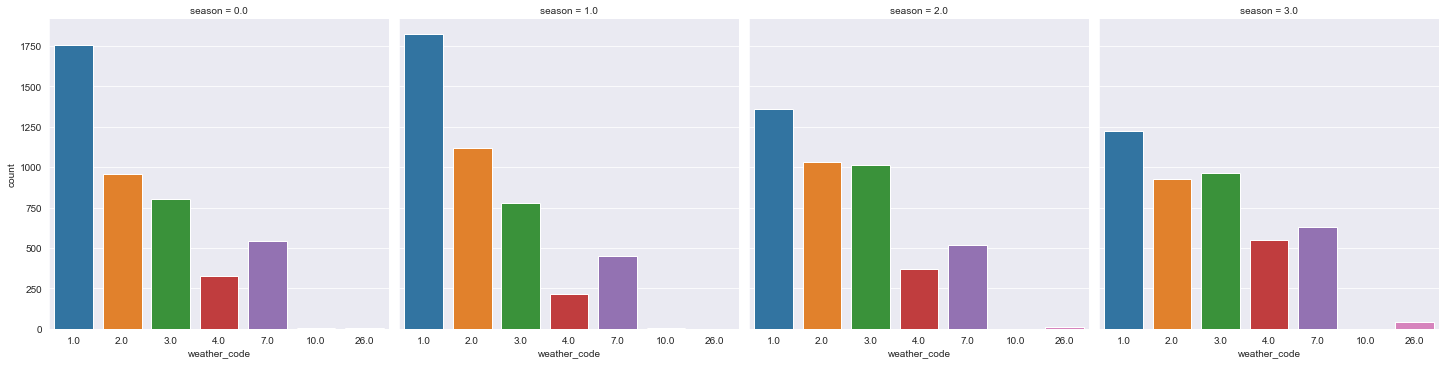

In [428]:
sns.catplot(x = 'weather_code', data = df_new, kind = 'count', col = 'season');

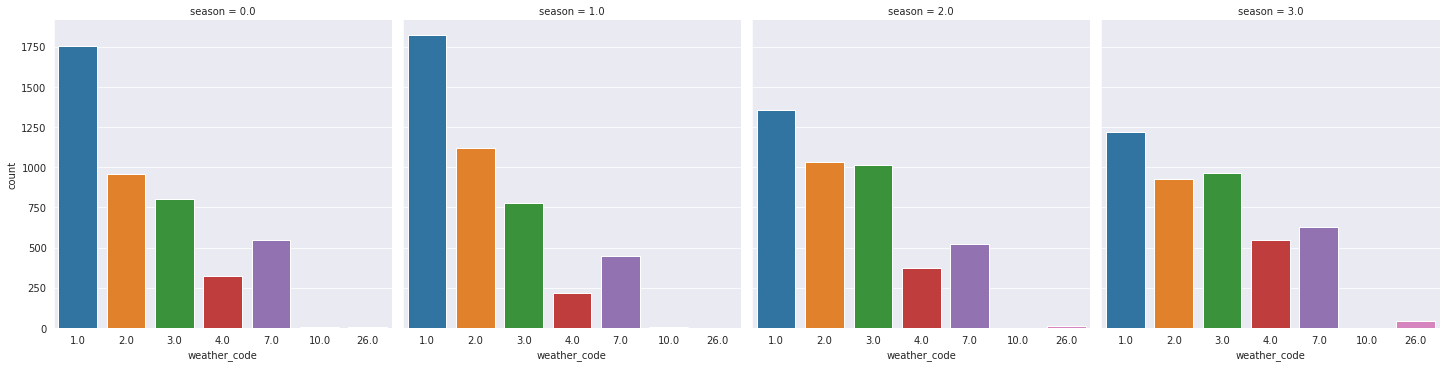

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

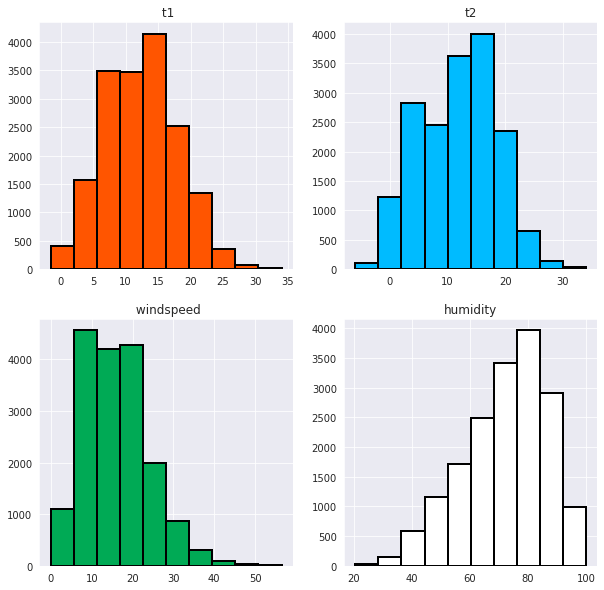

In [ ]:
# matplotlip hist


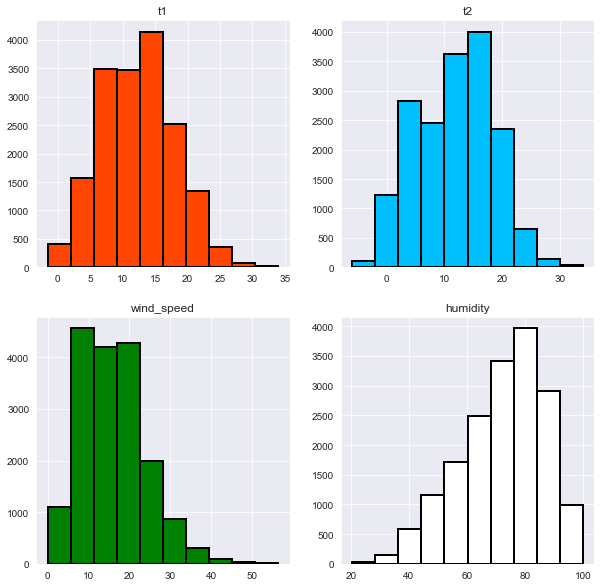

In [475]:
fig, axs = plt.subplots(2,2, figsize = (10,10))
axs [0, 0].hist(df_new.t1, color = 'orangered', edgecolor = 'black', lw = 2)
axs [0, 1].hist(df_new.t2, color = 'deepskyblue', edgecolor = 'black', lw =2)
axs [1, 0].hist(df_new.wind_speed, color = 'green',edgecolor = 'black', lw = 2)
axs [1, 1].hist(df_new.hum, color = 'white', edgecolor = 'black', lw = 2)
axs[0, 0].set_title("t1")
axs[0, 1].set_title("t2")
axs[1, 0].set_title("wind_speed")
axs[1, 1].set_title("humidity");

In [537]:
df_new.season.value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

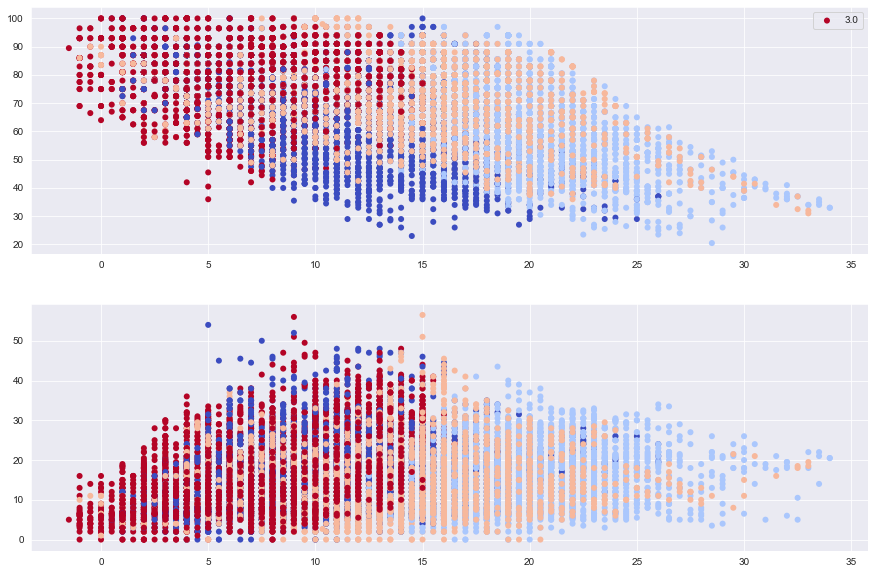

In [541]:
fig,axes  = plt.subplots(2,1, figsize = (15,10))

axes[0].scatter(df_new.t1, df_new.hum, c = df['season'],cmap = 'coolwarm', lw = 0.01)
axes[1].scatter(df_new.t1, df_new.wind_speed, c = df_new['season'],cmap = 'coolwarm' , lw = 0.01)
axes[0].legend(df['season']);

In [ ]:
plt.scatter()

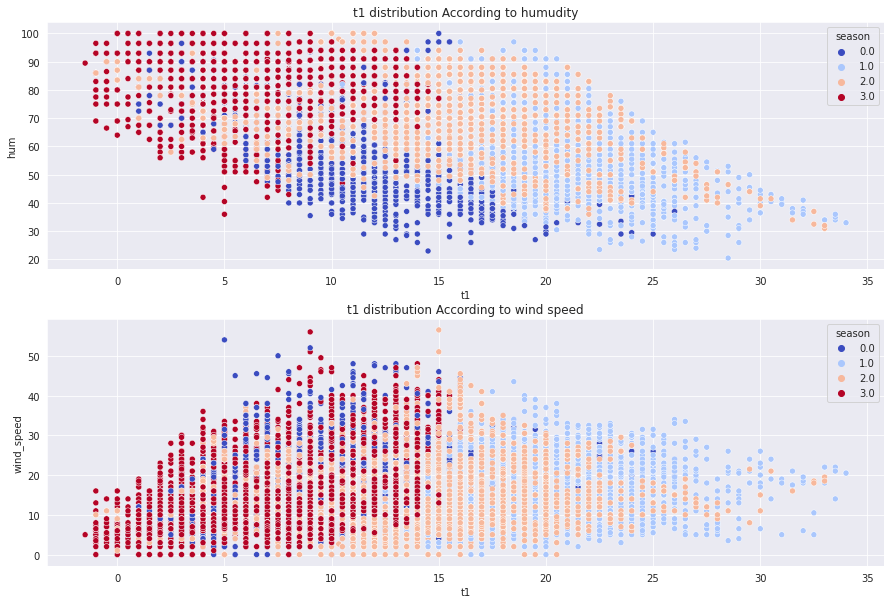

In [ ]:
# matplotlib scatterplot

In [ ]:
fig, axs = plt.subplots(2,1, figsize = (10,10))
axs [0, 0].sc(df_new.t1, color = 'orangered', edgecolor = 'black', lw = 2)
axs [1, 0].hist(df_new.t2, color = 'deepskyblue', edgecolor = 'black', lw =2)

In [ ]:
plt.scatter

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___